In [1]:
!pip install ctgan table_evaluator

In [2]:
import pandas as pd
df = pd.read_csv('data.csv')
df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s16,s17,s18,s19,s20,s21,RUL,label1,label2,cycle_norm
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,0,0,0.000000
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,0,0,0.002770
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,0,0,0.005540
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,0,0,0.008310
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,0,0,0.011080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477011,0.250000,0.0,0.0,0.686747,0.587312,0.782917,0.0,...,0.0,0.750000,0.0,0.0,0.271318,0.109500,4,1,2,0.540166
20627,100,197,0.408046,0.083333,0.0,0.0,0.701807,0.729453,0.866475,0.0,...,0.0,0.583333,0.0,0.0,0.124031,0.366197,3,1,2,0.542936
20628,100,198,0.522989,0.500000,0.0,0.0,0.665663,0.684979,0.775321,0.0,...,0.0,0.833333,0.0,0.0,0.232558,0.053991,2,1,2,0.545706
20629,100,199,0.436782,0.750000,0.0,0.0,0.608434,0.746021,0.747468,0.0,...,0.0,0.583333,0.0,0.0,0.116279,0.234466,1,1,2,0.548476


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          20631 non-null  int64  
 1   cycle       20631 non-null  int64  
 2   setting1    20631 non-null  float64
 3   setting2    20631 non-null  float64
 4   setting3    20631 non-null  float64
 5   s1          20631 non-null  float64
 6   s2          20631 non-null  float64
 7   s3          20631 non-null  float64
 8   s4          20631 non-null  float64
 9   s5          20631 non-null  float64
 10  s6          20631 non-null  float64
 11  s7          20631 non-null  float64
 12  s8          20631 non-null  float64
 13  s9          20631 non-null  float64
 14  s10         20631 non-null  float64
 15  s11         20631 non-null  float64
 16  s12         20631 non-null  float64
 17  s13         20631 non-null  float64
 18  s14         20631 non-null  float64
 19  s15         20631 non-nul

In [4]:
df.isna().sum()

id            0
cycle         0
setting1      0
setting2      0
setting3      0
s1            0
s2            0
s3            0
s4            0
s5            0
s6            0
s7            0
s8            0
s9            0
s10           0
s11           0
s12           0
s13           0
s14           0
s15           0
s16           0
s17           0
s18           0
s19           0
s20           0
s21           0
RUL           0
label1        0
label2        0
cycle_norm    0
dtype: int64

In [5]:
from ctgan import CTGAN

In [6]:
ctgan = CTGAN(verbose=True)
ctgan.fit(df)

Gen. (0.00) | Discrim. (0.00):   0%|          | 0/300 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Gen. (-3.06) | Discrim. (-0.05): 100%|██████████| 300/300 [08:25<00:00,  1.68s/it]


In [7]:
sample = ctgan.sample(20000)

In [8]:
sample

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s16,s17,s18,s19,s20,s21,RUL,label1,label2,cycle_norm
0,16,188,0.719054,0.583152,-0.000105,-0.000136,0.531557,0.402678,0.476949,0.000437,...,-0.000103,0.499071,-0.000061,0.000350,0.559378,0.737047,121,0,0,0.130474
1,39,67,0.593912,0.149068,-0.000078,-0.000537,0.346016,0.261105,0.369998,0.000730,...,-0.000182,0.249800,0.000394,0.000168,0.658337,0.645020,163,0,0,0.469556
2,91,84,0.409504,0.160308,-0.000168,-0.000248,0.345018,0.249425,0.451866,0.000370,...,-0.000457,0.335419,-0.000047,-0.000581,0.651217,0.711000,104,0,0,0.170950
3,37,62,0.720399,0.163254,-0.000007,0.000351,0.356022,0.389036,0.403990,0.000536,...,-0.000173,0.416739,0.000649,-0.000164,0.643968,0.638507,111,0,0,0.221880
4,95,108,0.632420,0.330575,0.000122,-0.000181,0.515778,0.360452,0.362935,0.000048,...,-0.000546,0.333895,-0.000023,-0.000601,0.753805,0.616455,87,0,0,0.252368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,63,63,0.572627,0.256320,0.000151,0.000096,0.330135,0.255487,0.417675,0.000891,...,-0.000238,0.416458,-0.000187,-0.000429,0.503902,0.706960,138,0,0,0.103360
19996,18,99,0.656070,0.584672,-0.000307,0.000025,0.710082,0.389109,0.702996,0.000412,...,-0.000093,0.583161,-0.000135,-0.000430,0.317343,0.529814,72,0,0,0.349088
19997,95,72,0.428454,0.246099,0.000393,0.000080,0.387268,0.412857,0.263234,0.000185,...,-0.000348,0.248244,0.000329,-0.000093,0.704095,0.679025,196,0,0,0.049570
19998,65,272,0.337366,0.918847,-0.000336,0.000064,0.578735,0.659549,0.566367,0.000081,...,0.000295,0.668974,-0.000274,0.000170,0.190580,0.393799,105,1,0,0.632179


In [9]:
output_file_path = "ctgan.csv"
sample.to_csv(output_file_path, index=False)
print(f"Data saved to {output_file_path}")

Data saved to ctgan.csv


(20631, 30) (20000, 30)


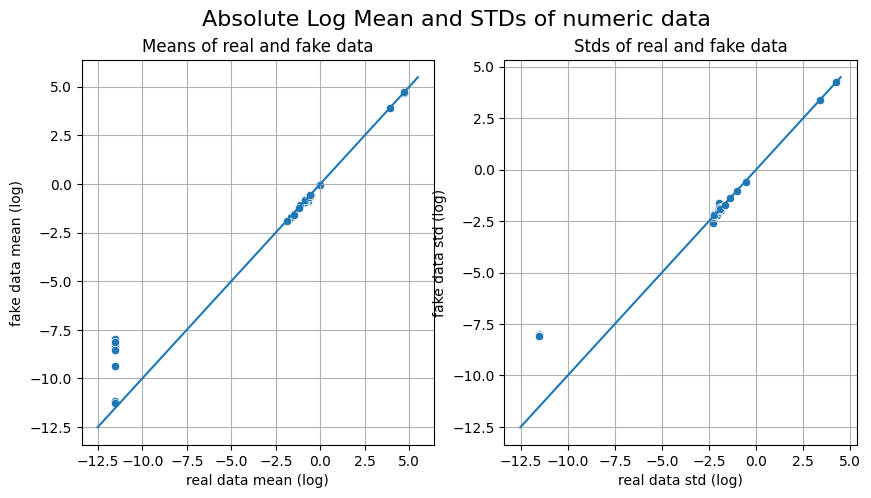

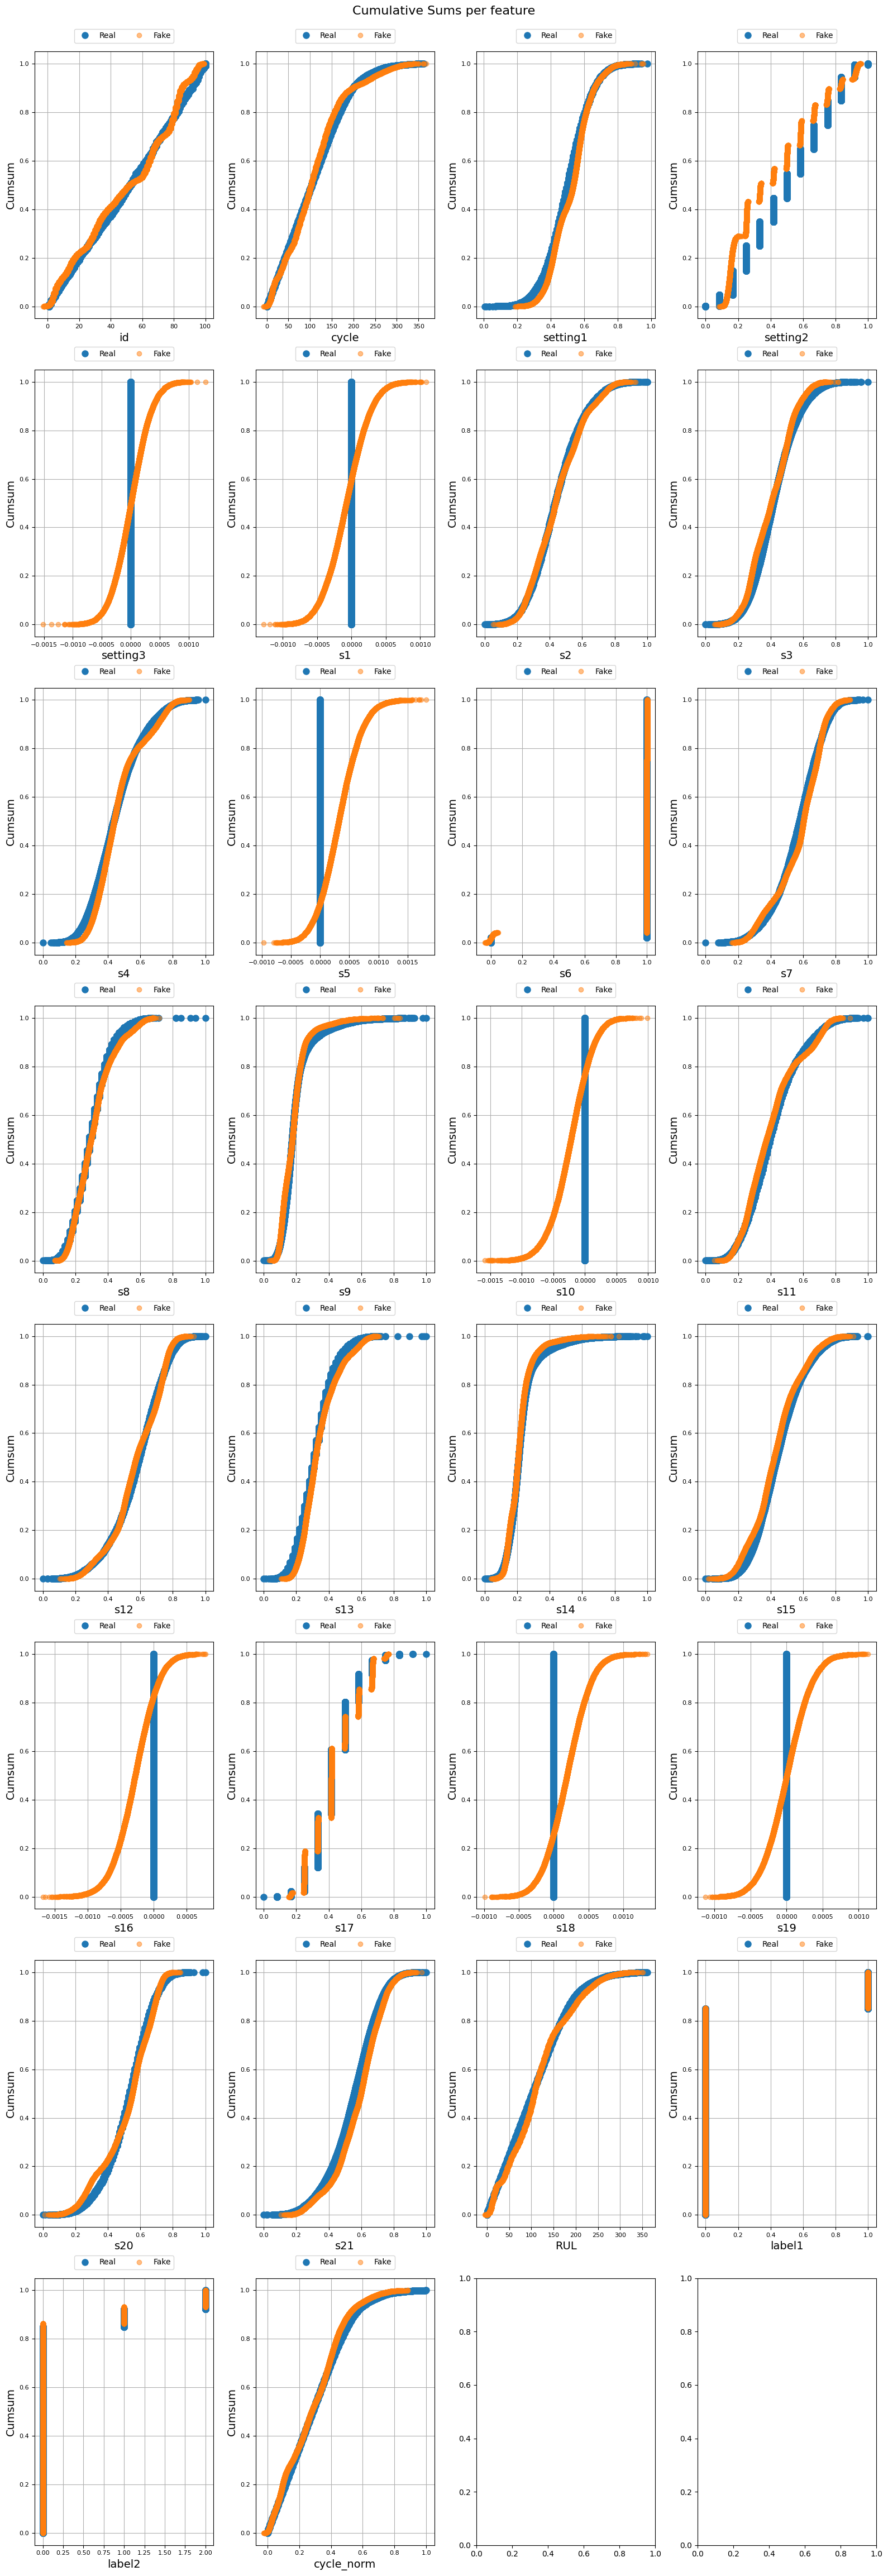

In [ ]:
from table_evaluator import TableEvaluator

print(df.shape, sample.shape)
table_evaluator =  TableEvaluator(df, sample)

table_evaluator.visual_evaluation()